In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing

In [2]:
stock_data_bac = pd.read_csv('BAC.csv')

stock_data_bac.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-11,15.32,15.70,15.21,15.63,14.045665,194958400
1,2009-12-14,15.67,15.73,15.43,15.63,14.045665,128586100
2,2009-12-15,15.45,15.51,15.15,15.19,13.650263,190193100
3,2009-12-16,15.33,15.44,15.23,15.28,13.731138,166373000
4,2009-12-17,15.27,15.36,14.83,14.86,13.353713,268907300


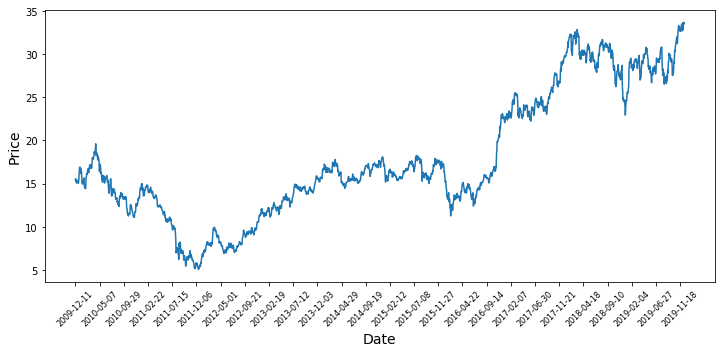

In [3]:
plt.figure(figsize = (12,5))
plt.plot((stock_data_bac['Low'] + stock_data_bac['High']) / 2.0)
plt.xticks(range(0, stock_data_bac.shape[0], 100), stock_data_bac['Date'].loc[::100], rotation = 45, fontsize = 8)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price',fontsize = 14)
plt.show()

In [7]:
input_features = ['Open','High','Low','Close', 'Adj Close']
'''Min-Max Scaler normalization'''
stock_data_bac_norm = stock_data_bac.copy()
for inp_fea in input_features:
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    stock_data_bac_norm[inp_fea] = min_max_scaler.fit_transform(stock_data_bac_norm[inp_fea].values.reshape(-1,1))

In [11]:
stock_data_bac_norm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-11,0.357368,0.366690,0.359162,0.370990,0.326803,194958400
1,2009-12-14,0.369618,0.367740,0.366841,0.370990,0.326803,128586100
2,2009-12-15,0.361918,0.360042,0.357068,0.355649,0.313239,190193100
3,2009-12-16,0.357718,0.357593,0.359860,0.358787,0.316013,166373000
4,2009-12-17,0.355618,0.354794,0.345899,0.344142,0.303066,268907300


In [12]:
def create_sequences(data, lookback, delay, min_index, max_index, shuffle = False, batch_size = 128, step = 6):
    '''Create sequence based on a specified len'''
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size = batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets



In [13]:
def conver_to_array(df, list_features, target):
    '''Convert a dataframe into a numpy array to train the model'''
    temp = df[target + list_features]
    float_data = temp.as_matrix()
    return float_data


In [14]:
float_data = conver_to_array(stock_data_bac_norm, list_features = ['Open'], target = ['Close'])
print(float_data)



[[0.37099026 0.35736787]
 [0.37099026 0.36961848]
 [0.35564856 0.3619181 ]
 ...
 [0.9944212  0.99369968]
 [0.99511858 0.99019958]
 [0.99895401 0.99299965]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [15]:
lookback = 15
step = 1
delay = 2
batch_size = 16
train_gen = create_sequences(float_data, lookback = lookback, delay = delay, min_index = 0, max_index = 2000, shuffle = False, step = step, batch_size = batch_size)
val_gen = create_sequences(float_data, lookback = lookback, delay = delay, min_index = 2001, max_index = 2300, shuffle = False, step = step, batch_size = 1)

val_steps = stock_data_bac_norm.shape[0] - 2000 - lookback
print(val_steps)

502


In [16]:
samples, targets = next(train_gen)
print(samples.shape)
print(samples[:3])

(16, 15, 2)
[[[0.37099026 0.35736787]
  [0.37099026 0.36961848]
  [0.35564856 0.3619181 ]
  [0.35878664 0.35771789]
  [0.34414228 0.35561778]
  [0.35006976 0.34651733]
  [0.35878664 0.35351768]
  [0.36053001 0.35876794]
  [0.35564856 0.36226811]
  [0.35774061 0.35421771]
  [0.35913531 0.35701785]
  [0.35320783 0.35666783]
  [0.35146446 0.34756738]
  [0.35111578 0.34931747]
  [0.37308231 0.35456773]]

 [[0.37099026 0.36961848]
  [0.35564856 0.3619181 ]
  [0.35878664 0.35771789]
  [0.34414228 0.35561778]
  [0.35006976 0.34651733]
  [0.35878664 0.35351768]
  [0.36053001 0.35876794]
  [0.35564856 0.36226811]
  [0.35774061 0.35421771]
  [0.35913531 0.35701785]
  [0.35320783 0.35666783]
  [0.35146446 0.34756738]
  [0.35111578 0.34931747]
  [0.37308231 0.35456773]
  [0.39086478 0.3720686 ]]

 [[0.35564856 0.3619181 ]
  [0.35878664 0.35771789]
  [0.34414228 0.35561778]
  [0.35006976 0.34651733]
  [0.35878664 0.35351768]
  [0.36053001 0.35876794]
  [0.35564856 0.36226811]
  [0.35774061 0.354217

In [17]:
print(targets[:2])

[0.40497025 0.41547077]
